## Base figures plotting filtering event examples

In [1]:
%matplotlib widget
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.style.use("./actroot.mplstyle")
import numpy as np
import cmcrameri.cm as cmc

import base


### Splitting recoils

In [2]:
## General settings
figsize = (8.5, 3.5)
twocols = ["dodgerblue", "crimson"]
threecols = ["crimson", "dodgerblue", "darkorange"]
alw = 1.5

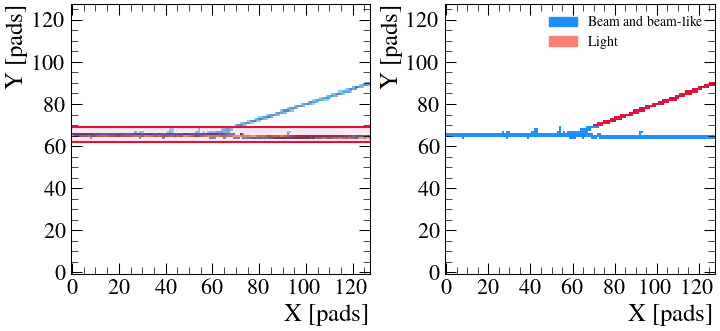

In [3]:
split = base.parse("../Events/run_157_entry_6749.dat")
# Figure
fig = plt.figure("split", figsize=figsize)
fig.clf()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Before splitting
base.plot_unique(split,"", ax1)
# Add lines
ax1.plot([0, 127], [69, 69], color="crimson", lw=1.5)
ax1.plot([0, 127], [62, 62], color="crimson", lw=1.5)
ax1.fill_between([0, 127], 69, 62, color="hotpink", alpha=0.15)

# After splitting
fsplit = np.full_like(split, np.nan)
beam = ~np.isnan(split[:, 62:70])
fsplit[:, 62:70] = np.where(beam, 0, fsplit[:, 62:70])
light = ~np.isnan(split[:, 70:])
fsplit[:, 70:] = np.where(light, 1, fsplit[:, 70:])
# Color map
ax2.imshow(fsplit.T, origin="lower", aspect="equal", interpolation="none", 
    cmap=plt.cm.colors.ListedColormap(twocols))
base.format_ax(ax2)

# Legend
psplit = [mpatches.Patch(color="dodgerblue", label="Beam and beam-like"),
          mpatches.Patch(color="salmon", label="Light")]
plt.legend(handles=psplit)

plt.show()
plt.gcf().savefig("./Outputs/split.pdf")

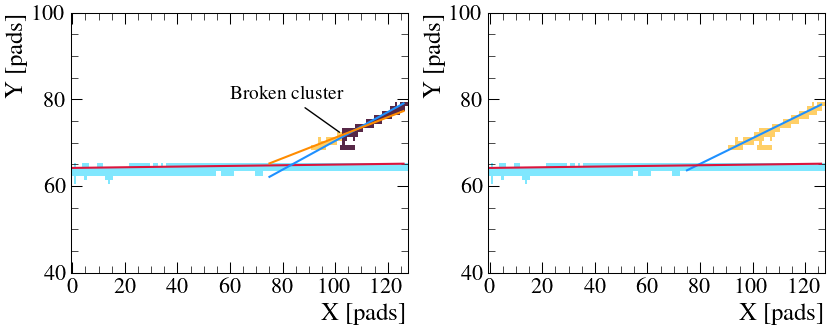

In [22]:
qbroken, idbroken = base.parse_with_id("../Events/run_157_entry_46581.dat")
qlines = base.parse_lines("../Events/lines_run_157_entry_46581.dat")

fig = plt.figure("broken", figsize=figsize)
gs = fig.add_gridspec(1, 2, height_ratios=[1])
fig.clf()
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Before splitting
base.plot_unique(idbroken,"", ax1)
l0 = base.plot_line(qlines[0], 0, 127, ax1, color=threecols[0], lw=alw)
l1 = base.plot_line(qlines[1], 75, 127, ax1, color=threecols[1], lw=alw)
l2 = base.plot_line(qlines[2], 75, 127, ax1, color=threecols[2], lw=alw)

# After correcting
_, okbroken = base.parse_with_id("../Events/ok_run_157_entry_46581.dat")
# Workaround: invert colors
okbroken[okbroken == 0] = -1
okbroken[okbroken == 1] = 0
okbroken[okbroken == -1] = 1
oklines = base.parse_lines("../Events/lines_ok_run_157_entry_46581.dat")
base.plot_unique(okbroken,"", ax2)
base.plot_line(oklines[0], 75, 127, ax2, color=threecols[1], lw=alw)
base.plot_line(oklines[1], 0, 127, ax2, color=threecols[0], lw=alw)

## Common settings for both
for ax in [ax1, ax2]:
    ax.set_ylim(40, 100)

# Annotations
ax1.annotate("Broken cluster", xy=(102.5, 72), xytext=(60, 80),
        fontsize=14,
        arrowprops=dict(arrowstyle="-"))

plt.tight_layout()
plt.show()
plt.savefig("./Outputs/merge.pdf")
